In [ ]:
#Experiment - Creating a version of conditions utilized in;
#Feinberg, D. R., Jones, B. C., Little, A. C., Burt, D. M., & Perrett, D. I. (2005). 
#Manipulations of fundamental and formant frequencies influence the attractiveness of human male voices. Animal behaviour, 69(3), 561-568.



#Import main libraries
from psychopy import core, visual, event, gui, sound
import os, glob
import wavio #wavio to open .wav files 
import random

#Set file directory - Change directory 'path = ' based on where audio files are on different computers 
path = #insert directory containing .wav voice pitch files
os.chdir(path)

#Pull in each of the audio files
wavfiles = []
for file in glob.glob("*.wav"):
    wavio.read(file)
    wavfiles.append(file)

#Generate ID field to record participatn ID 
def get_id():
    mygui = gui.Dlg()
    mygui.addField("Subject ID:")
    mygui.show()
    participant_ID = mygui.data[0]
    return participant_ID

#Create Window with welcome message to the experiment
win = visual.Window([800,800])
message = visual.TextStim(win, text= 'Welcome to the experiment."You will hear a total of 30 voices. After each you will be asked to rate how attractive each voice is on a scale from 1 to 7." Please press any key to continue ')
message.autoDraw = True
win.flip()
event.waitKeys()
win.close()

random.shuffle(wavfiles)

#create empty data list for responses and data dictionary to store list to adjacent participant id
data_dictionary = {}
data = []


current_participant = get_id()
for i in range (0,3): #Run 30 trials of voices (i.e. 3 blocks)
    for wav in wavfiles:
        voice = 0
        win = visual.Window([400,400])
        message = visual.TextStim(win, text= "Left/Right Keys to move,'Enter/Return' to Select")
        message.autoDraw = True
        win.flip()
        voice = sound.Sound(wav)
        voice.play()
        scales = '1=Very Unattractive         4=Neutral                            7=Very Attractive'
        ratingScale = visual.RatingScale(win, scale=scales, pos=(0.5,0.5), markerStart=4) 
        core.wait(3)
        while ratingScale.noResponse:
            ratingScale.draw()
            win.flip()
        rating = (wav, ratingScale.getRating())
        decisionTime = ratingScale.getRT()
        choiceHistory = ratingScale.getHistory()
        data.append(rating)
        data_dictionary[current_participant] = data
    
print(data_dictionary) #Displays Participant ID and list of responses per ID - Each participant has a list of 30 ratings

2.6987 	WARNING 	Monitor specification not found. Creating a temporary one...


ArgumentError: ("argument 1: <class 'RecursionError'>: maximum recursion depth exceeded while calling a Python object", "selector = b'inLiveResize'", "argtypes =[<class 'ctypes.c_void_p'>, <class 'ctypes.c_void_p'>]", "encoding = b'c16@0:8'")

In [1]:
#Generate Data From paper and conduct analysis
import numpy as np
from numpy import var
import pandas as pd
import math

mean = [4.5, 3.8]  #diff of .7 between high and low pitch as noted in paper (Figure 2)
cov = [[1, -0.678], [-0.678, 1]]
n_size = 68

##Simulate data (low and high pitch)
low_pitch, high_pitch = np.random.multivariate_normal(mean, cov, size = n_size).T


In [2]:
#Create cohend's d function for effect size of t test 
from numpy import mean
from numpy import var
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    #calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s
 

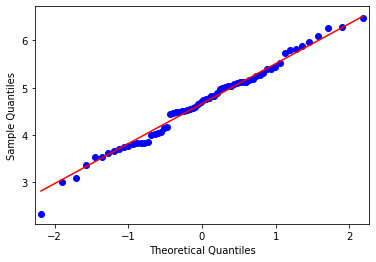

In [5]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

#Normality checks via QQ-Plot
#Note: while data is simulated using normal distribution call, checking just to ensure

#Low Pitch QQ Plot
qqplot(low_pitch, line = 's')
plt.show() #normal

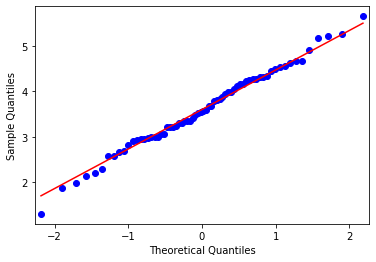

In [4]:
#High Pitch QQ Plot
qqplot(high_pitch, line = 's')
plt.show() #normal

In [6]:
#conduct t-test on data
from scipy import stats
model_results = stats.ttest_rel(low_pitch, high_pitch)

#Effect size
eff_size = cohend(low_pitch, high_pitch)


print("Test Statistic and P-Value:",model_results, 
      "Effect Size:",eff_size)

Test Statistic and P-Value: Ttest_relResult(statistic=5.756122327473398, pvalue=2.3425426333465467e-07) Effect Size: 1.2269238701841814


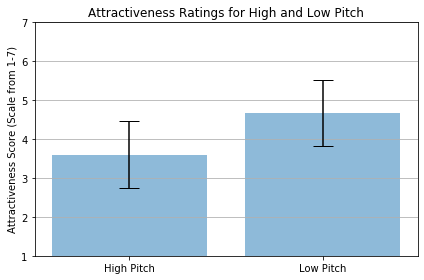

In [8]:
#Graph results
import matplotlib.pyplot as plt

#Plot results
# Create lists for the plot
high_pitch_mean = np.mean(high_pitch)
high_pitch_stndrd = np.std(high_pitch)
low_pitch_mean = np.mean(low_pitch)
low_pitch_stndrd = np.std(low_pitch)

varss = ['High Pitch', 'Low Pitch']
x_pos = np.arange(len(varss))
CTEs = [high_pitch_mean, low_pitch_mean]
error = [high_pitch_stndrd,low_pitch_stndrd]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Attractiveness Score (Scale from 1-7)')
ax.set_xticks(x_pos)
ax.set_xticklabels(varss)
ax.set_title('Attractiveness Ratings for High and Low Pitch')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.ylim(1,7)
plt.show()